In [2]:
import keras
from keras.datasets import cifar100
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [4]:
# Print the shapes of the datasets
print(X_train.shape)  
print(y_train.shape) 
print(X_test.shape)   
print(y_test.shape)   


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


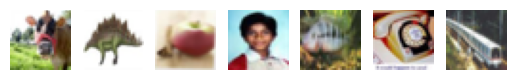


digit =  [86]


In [5]:
# Display the images

for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

# Display the labelled digit for the picture
lbl = y_train[5]
print("\ndigit = ", lbl)

In [6]:
#normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [7]:
#encode the target labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Initialize the model
model = Sequential()

# Input layer + First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer for 100 classes
model.add(Dense(100, activation='softmax'))

# Print model summary
model.summary()


In [ ]:
from tensorflow.keras.utils import plot_model
# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [16]:
from PIL import Image

# Open and resize the image
img = Image.open("model.png")
img = img.resize((img.width // 2, img.height // 2))  # Reduce size by 50%
img.save("model_small.png", optimize=True, quality=70)  # Lower quality = smaller size


In [13]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

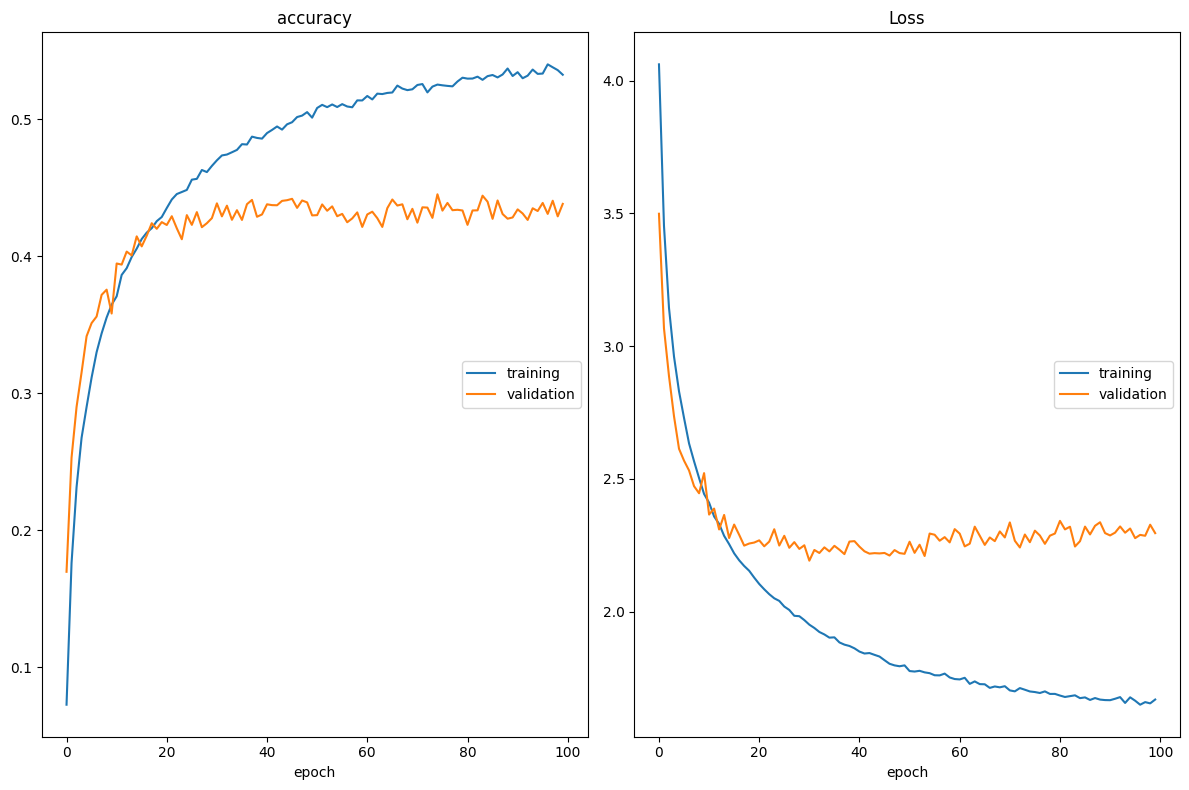

accuracy
	training         	 (min:    0.073, max:    0.540, cur:    0.532)
	validation       	 (min:    0.170, max:    0.445, cur:    0.438)
Loss
	training         	 (min:    1.650, max:    4.062, cur:    1.669)
	validation       	 (min:    2.192, max:    3.499, cur:    2.296)


In [14]:
from livelossplot import PlotLossesKeras
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[PlotLossesKeras()], verbose=0)

In [21]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("\nTest loss:", loss)
print("Test accuracy:", accuracy)


Test loss: 2.296008586883545
Test accuracy: 0.4381999969482422


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,809,742 (10.72 MB)

 Trainable params: 936,580 (3.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,873,162 (7.15 MB)